In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medium-articles-dataset/medium_data.csv


## Loading a libraries 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_theme('notebook')
plt.rcParams['figure.figsize']=(20,10)

# Loading a file

In [34]:
medium_art=pd.read_csv('/kaggle/input/medium-articles-dataset/medium_data.csv')

In [35]:
medium_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2498 non-null   int64  
 1   url           2498 non-null   object 
 2   title         2498 non-null   object 
 3   subtitle      2073 non-null   object 
 4   claps         2423 non-null   float64
 5   responses     2498 non-null   int64  
 6   reading_time  2498 non-null   int64  
 7   publication   2498 non-null   object 
 8   date          2498 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 175.8+ KB


In [36]:
medium_art.describe()

,id,claps,responses,reading_time
count,2498.000000,2423.000000,2498.000000,2498.000000
mean,1249.500000,367.353281,5.544035,7.479984
std,721.254809,678.886988,12.793039,3.699977
min,1.000000,0.000000,0.000000,1.000000
25%,625.250000,62.000000,0.000000,5.000000
50%,1249.500000,155.000000,2.000000,7.000000
75%,1873.750000,381.500000,5.000000,9.000000
max,2498.000000,11100.000000,207.000000,43.000000


In [37]:
medium_art.head(10)

,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/not-all-rainbow...,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453.0,11,9,Towards Data Science,27-01-2023
1,2,https://towardsdatascience.com/ethics-in-ai-po...,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311.0,3,12,Towards Data Science,27-01-2023
2,3,https://towardsdatascience.com/python-tuple-th...,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27-01-2023
3,4,https://towardsdatascience.com/dates-and-subqu...,Dates and Subqueries in SQL,Working with dates in SQL,15.0,1,4,Towards Data Science,27-01-2023
4,5,https://towardsdatascience.com/temporal-differ...,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27-01-2023
5,6,https://towardsdatascience.com/numpy-character...,Going Under the Hood of Character-Level RNNs: ...,Due to the recent…,27.0,0,17,Towards Data Science,27-01-2023
6,7,https://uxdesign.cc/chatgpt-isnt-all-it-seems-...,"ChatGPT isn’t all it seems, read this before y...",ChatGPT is an AI…,178.0,2,8,UX Collective,27-01-2023
7,8,https://medium.com/swlh/10-subtle-strategies-i...,10 Subtle Strategies I Wish I Knew When I Had ...,NaN,3200.0,51,6,The Startup,27-01-2023
8,9,https://medium.com/swlh/how-to-start-a-niche-s...,How To Start A Niche Site in Under 3 Hours (Wi...,How to build a niche site in only one hour…,426.0,7,8,The Startup,27-01-2023
9,10,https://medium.com/swlh/dont-become-a-full-tim...,Don’t Become a Full-Time Content Creator If Yo...,A friendly warning before you…,847.0,10,4,The Startup,27-01-2023


In [38]:
medium_art.drop(columns=['url','id'],axis=1,inplace=True)

In [39]:
medium_art.head(10)

,title,subtitle,claps,responses,reading_time,publication,date
0,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453.0,11,9,Towards Data Science,27-01-2023
1,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311.0,3,12,Towards Data Science,27-01-2023
2,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27-01-2023
3,Dates and Subqueries in SQL,Working with dates in SQL,15.0,1,4,Towards Data Science,27-01-2023
4,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27-01-2023
5,Going Under the Hood of Character-Level RNNs: ...,Due to the recent…,27.0,0,17,Towards Data Science,27-01-2023
6,"ChatGPT isn’t all it seems, read this before y...",ChatGPT is an AI…,178.0,2,8,UX Collective,27-01-2023
7,10 Subtle Strategies I Wish I Knew When I Had ...,NaN,3200.0,51,6,The Startup,27-01-2023
8,How To Start A Niche Site in Under 3 Hours (Wi...,How to build a niche site in only one hour…,426.0,7,8,The Startup,27-01-2023
9,Don’t Become a Full-Time Content Creator If Yo...,A friendly warning before you…,847.0,10,4,The Startup,27-01-2023


# Feature Engineering

In [40]:
medium_art['date']=pd.to_datetime(medium_art['date'])

In [41]:
medium_art['day']=medium_art['date'].dt.day

In [42]:
medium_art['month']=medium_art['date'].dt.month

In [43]:
medium_art['year']=medium_art['date'].dt.year

In [44]:
medium_art.drop('date',axis=1,inplace=True)

In [45]:
medium_art.drop_duplicates(inplace=True)

In [ ]:
medium_art.shape

> # Two columns have missing values and the name of the columns are following  
> # 1. **subtitle**
> # 2. **claps**

In [46]:
medium_art['claps'].value_counts().sort_values(ascending=True).head(2)

1940.0    1
504.0     1
Name: claps, dtype: int64

In [47]:
medium_art[medium_art['claps']==0]

,title,subtitle,claps,responses,reading_time,publication,day,month,year
659,Making a Scene: How to Go Deep to Maximize Act...,Are you getting the most out of every…,0.0,0,5,The Writing Cooperative,2,8,2023
769,The Ultimate Guide to a Successful MFA Applica...,A 3-step process that will ensure you focus on...,0.0,0,8,The Writing Cooperative,18,1,2023


> # Row number 659, where the values of day column and month column have been switched, is where we discovered that the observation from these claps columns is actually equal to 0.

In [48]:
medium_art[pd.isna(medium_art['subtitle'])].head(10)

,title,subtitle,claps,responses,reading_time,publication,day,month,year
2,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27,1,2023
4,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27,1,2023
7,10 Subtle Strategies I Wish I Knew When I Had ...,NaN,3200.0,51,6,The Startup,27,1,2023
10,Why Storytelling Is A Critical Skill For Start...,NaN,477.0,2,6,The Startup,27,1,2023
24,I’ve Been Writing Online for the Last 9 Years ...,NaN,2600.0,58,5,The Startup,3,4,2023
29,"<strong class=""markup--strong markup--h3-stron...",NaN,293.0,1,7,The Startup,3,4,2023
33,Tackling the Problems of a Changing World with...,NaN,15.0,0,3,Towards Data Science,30,3,2023
34,Why is it so difficult to successfully get AI ...,NaN,101.0,0,9,Towards Data Science,30,3,2023
41,"4 Months Ago, I Quit My Job to Start My Own Bu...",NaN,11.0,0,7,The Startup,30,3,2023
42,Selling Your Self-Published Novel is All About...,NaN,22.0,0,7,The Writing Cooperative,30,3,2023


> # Row numbers 24,29, where the values of day column and month column have been switched, is where we discovered that the observation from these subtitle column is actually equal to Null.

In [49]:
medium_art[(medium_art['day']>30) | (medium_art['month']> 3)]

,title,subtitle,claps,responses,reading_time,publication,day,month,year
16,"<strong class=""markup--strong markup--h3-stron...","<strong class=""markup--strong markup--h4-stron...",117.0,1,6,Towards Data Science,3,4,2023
17,Coupon Collector’s Problem: A Probability Mast...,Unpacking the intricacies of a classic…,198.0,2,14,Towards Data Science,3,4,2023
18,R for Data Analysis: How to Find the Perfect C...,How to Build End-to-End…,88.0,0,9,Towards Data Science,3,4,2023
19,Sparkles aren’t good UX✨,"Even if they’re aesthetically pleasing, you ca...",210.0,3,6,UX Collective,3,4,2023
20,Visualizing direction and the use of arrows,How graphic arrows support our natural abiliti...,372.0,5,7,UX Collective,3,4,2023
...,...,...,...,...,...,...,...,...,...
2045,4 Advice of Freelance Gurus You May Not Want t...,Freelancing is about something…,207.0,2,5,The Startup,2,5,2023
2046,The Antidote to Writer’s Block,No alchemy required,254.0,4,7,The Writing Cooperative,2,5,2023
2047,The Duality of Certain Indefinite Pronouns Def...,And when to use…,307.0,2,3,The Writing Cooperative,2,5,2023
2048,Your Muse Is Not Coming,You are Your Own Muse,219.0,6,3,The Writing Cooperative,2,5,2023


> # Total number of row 578, where the values of day column and month column have been switched, is where we discovered that the observation by using above condition

In [50]:
def correct_month_day(df,day_col,month_col):
    row_select=(df[day_col]>30) | (df[month_col]> 3)
    df.loc[row_select, [day_col,month_col]]=df.loc[row_select, [month_col,day_col]].values    
    return df 

> # Developed a function that switches the days and months back and forth.

In [51]:
medium_art=correct_month_day(medium_art,'day','month')

> # Handling missing values 

In [52]:
medium_art['subtitle'].fillna('Not filled',inplace=True)

In [53]:
medium_art['claps'].fillna(0,inplace=True)

In [54]:
medium_art.sort_values(ascending=False,by='claps').head(5)

,title,subtitle,claps,responses,reading_time,publication,day,month,year
1167,How I Write 2 Articles Most Mornings Before Wo...,The secret to producing a lot of…,11100.0,207,4,The Startup,4,2,2023
418,How ChatGPT Works: The Model Behind The Bot,A brief introduction to the intuition and meth...,7100.0,130,8,Towards Data Science,30,1,2023
338,I Got Fired From My 9–5 For Having a Medium Ac...,I was abruptly fired from a very nice 75k-a-year…,6800.0,123,4,The Startup,19,3,2023
898,"How I Write 480,000 Words a Month and Never Ru...",You can write a lot more than you…,6300.0,102,6,The Writing Cooperative,3,3,2023
713,What Makes Me Skip Your Story,Any of these 5 things will get me out of your ...,5400.0,92,7,The Writing Cooperative,15,1,2023


> # Data visualization 

> # 1. How to write a good article?

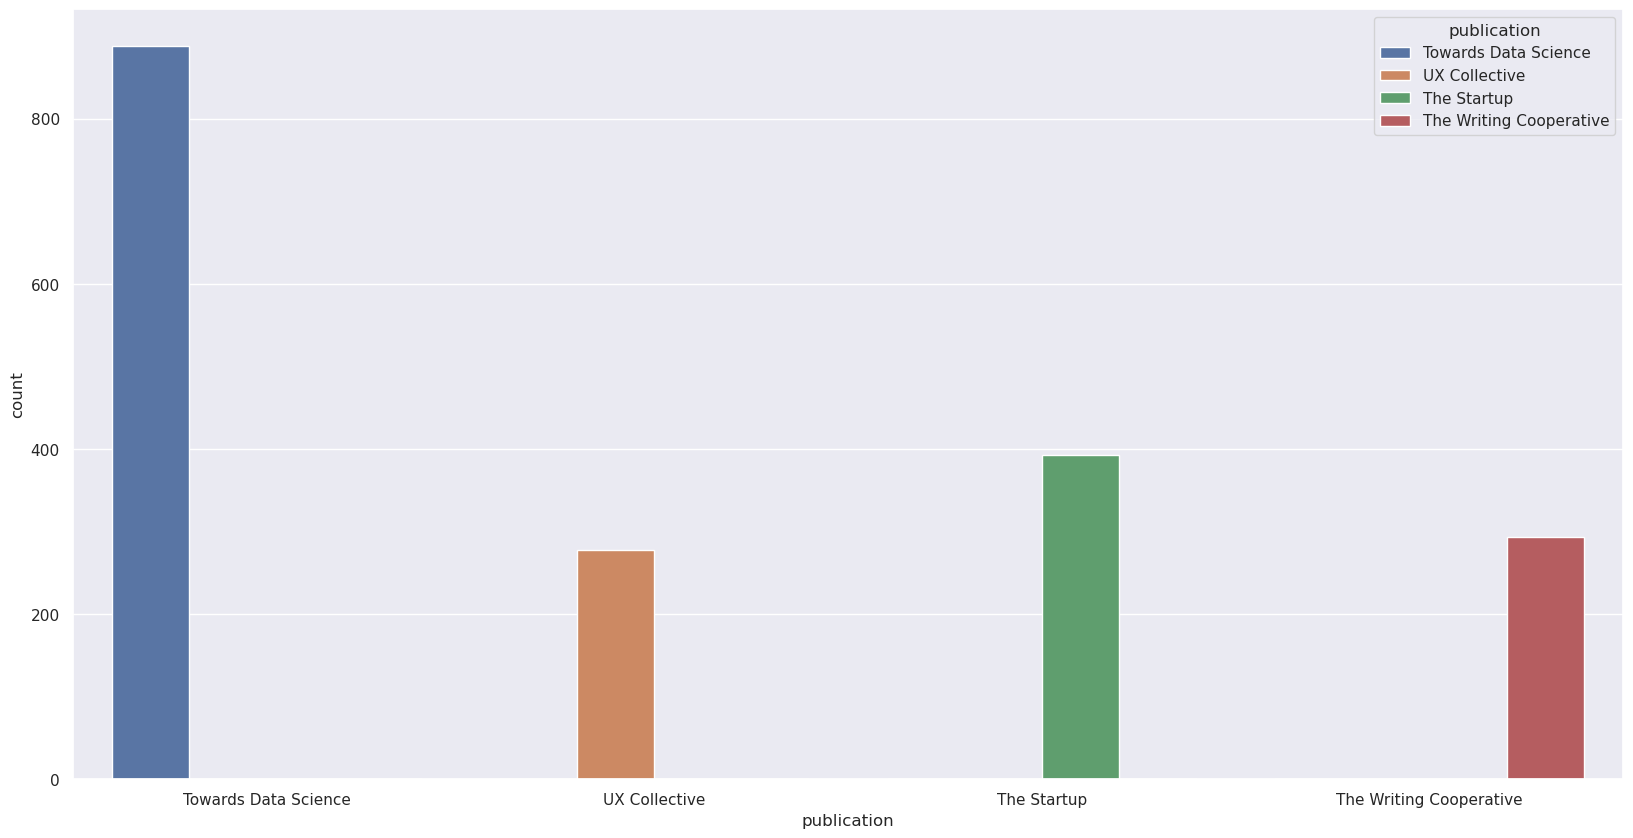

In [67]:
sns.countplot(x='publication', hue='publication', data=medium_art)
plt.savefig('anwser number1.jpg')
plt.show()

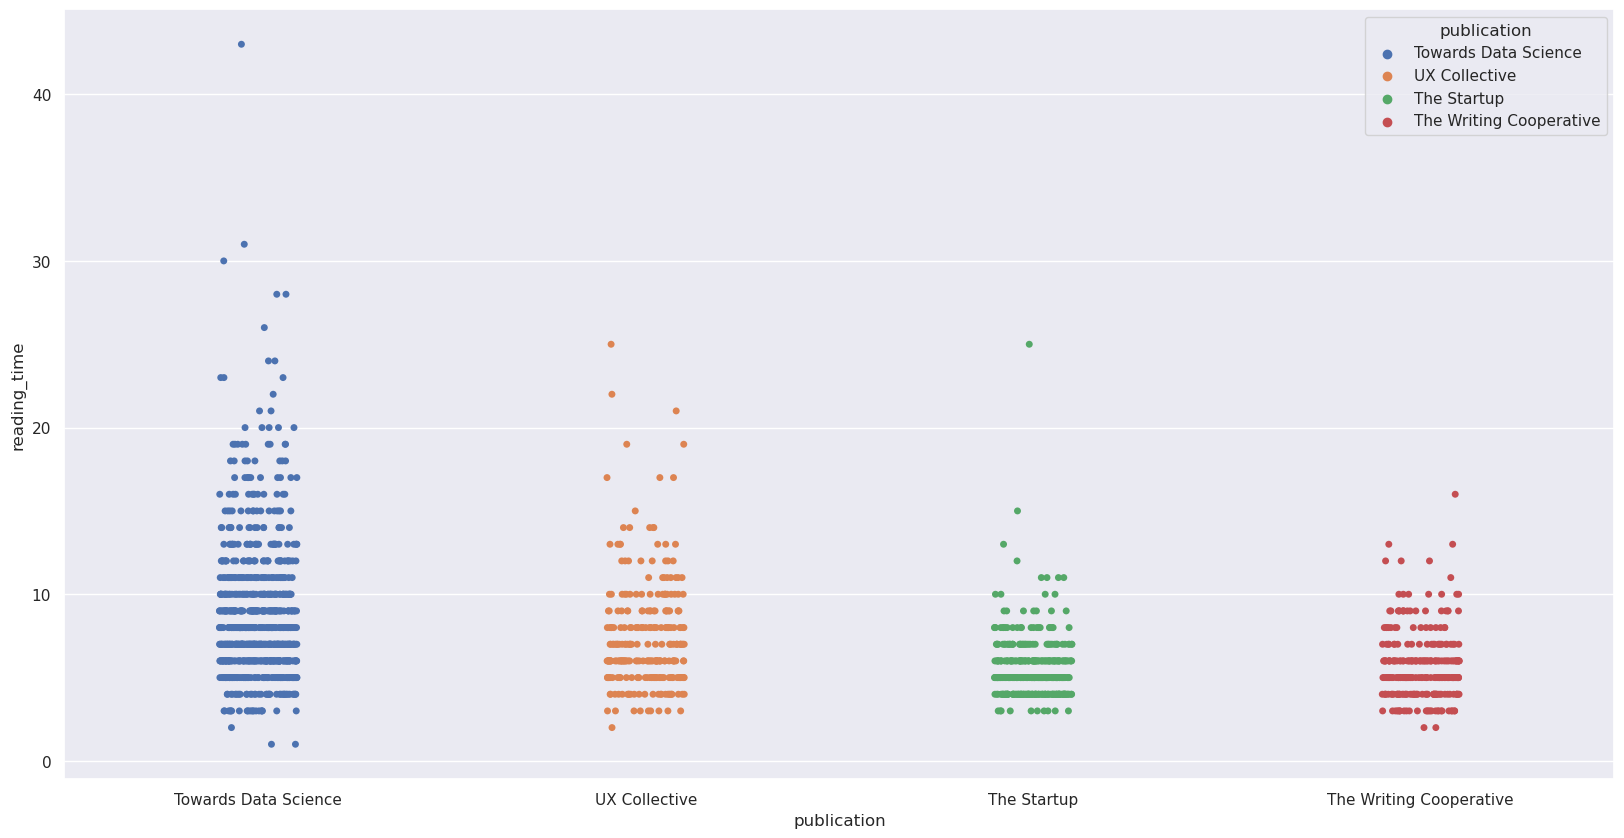

In [68]:
sns.stripplot(data=medium_art,y='reading_time',x='publication',hue='publication')
plt.savefig('anwser number1.1.jpg')
plt.show()

# A:More writing means more learning and greater attention from readers.

> # 2. How to inform the reader in an interesting way?

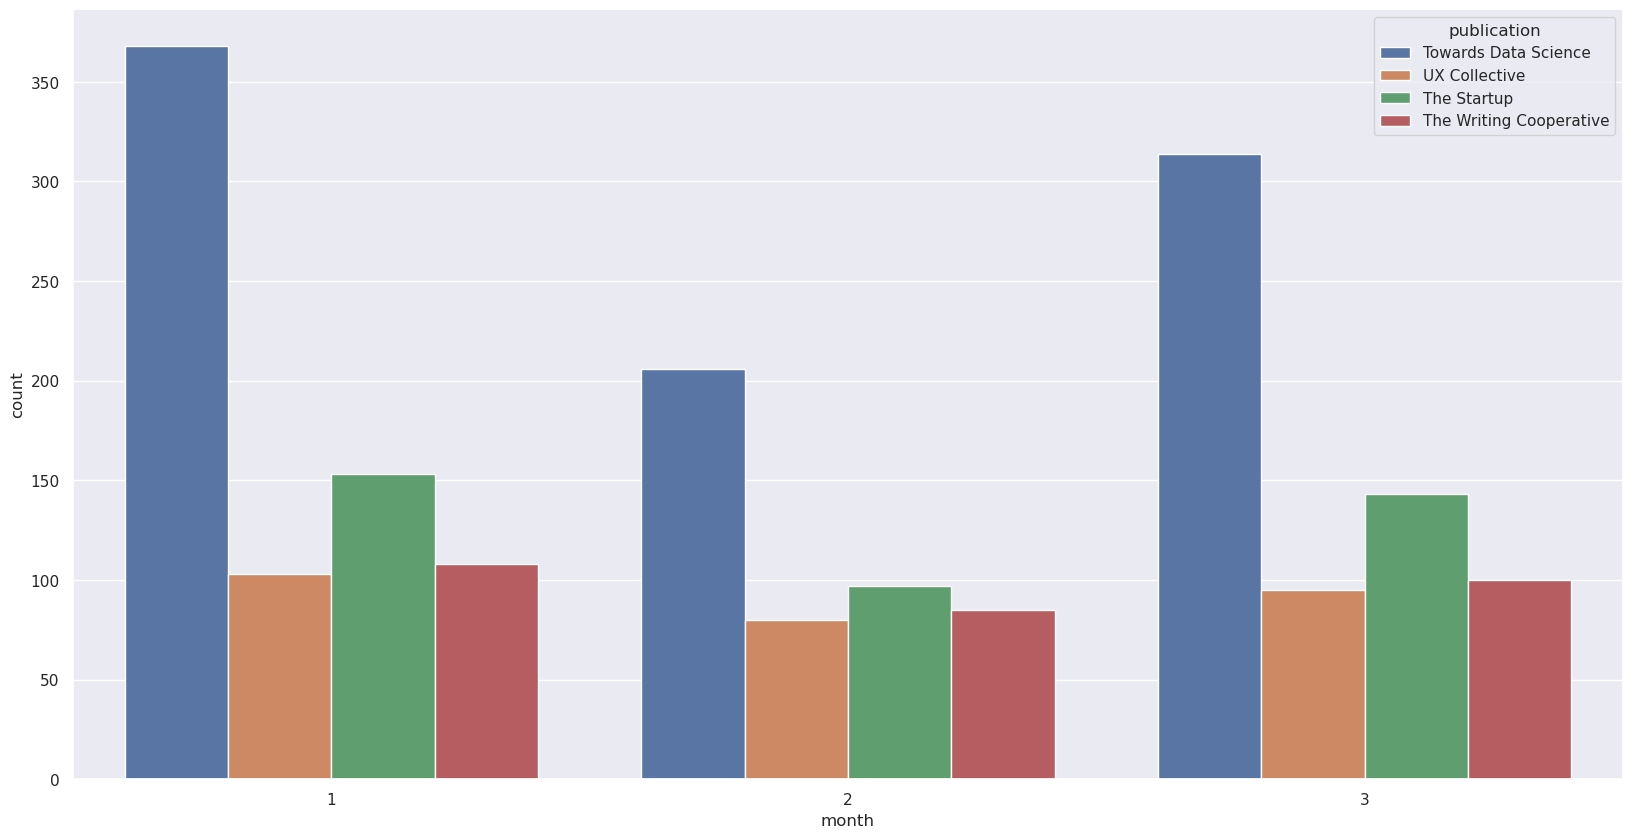

In [69]:
sns.countplot(data=medium_art,x='month',hue='publication')
plt.savefig('anwser number2.jpg')
plt.show()

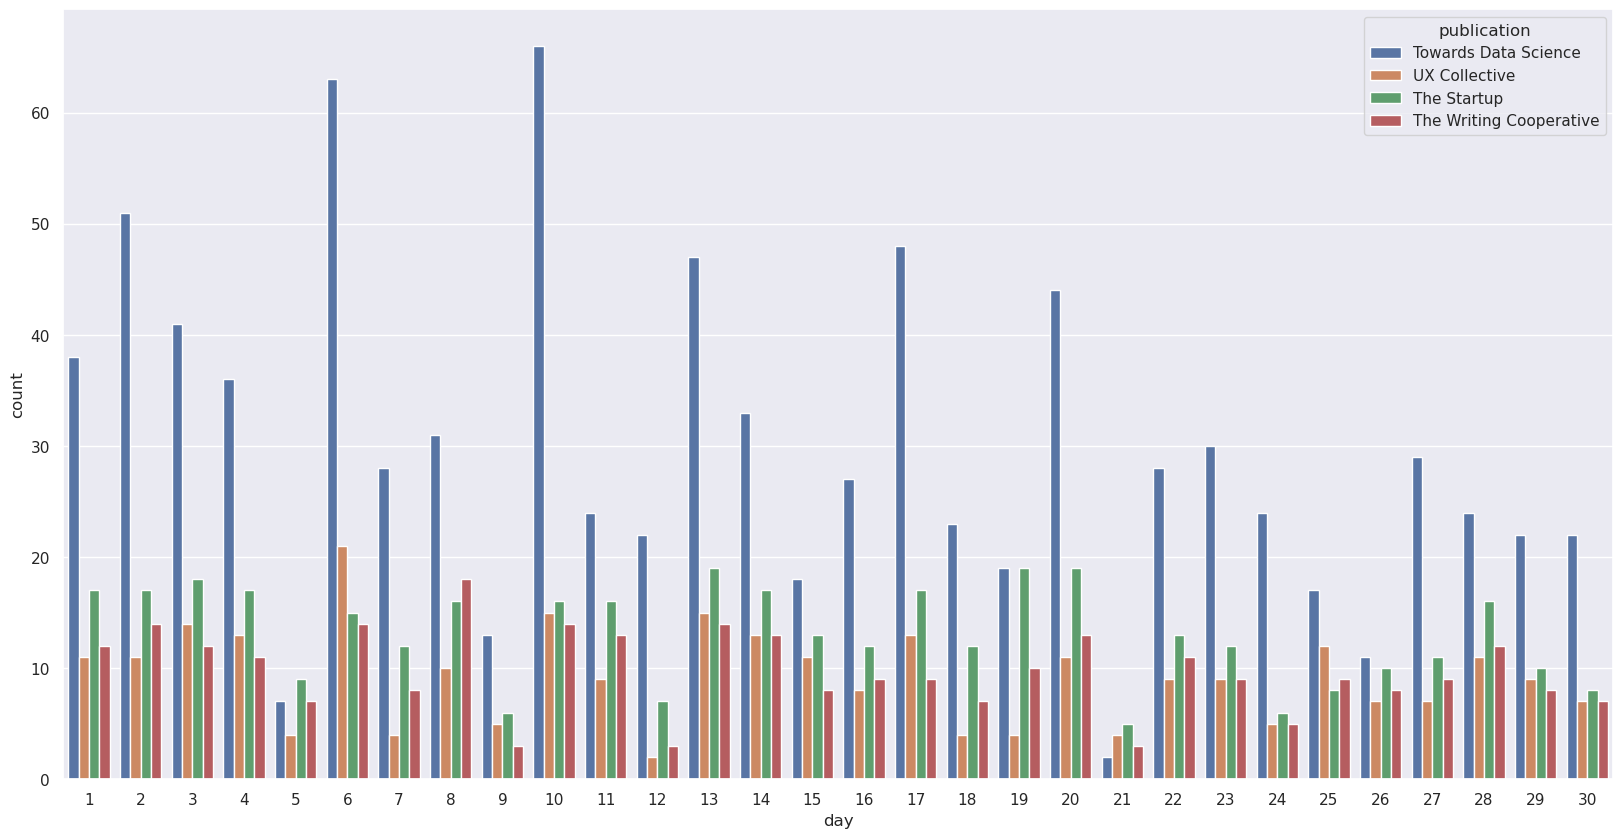

In [70]:
sns.countplot(data=medium_art,x='day',hue='publication')
plt.savefig('anwser number2.1.jpg')
plt.show()

# A:The only way to informing reader by writing it everyday which enables notification

> # 3. What sort of title attracts more crowd?

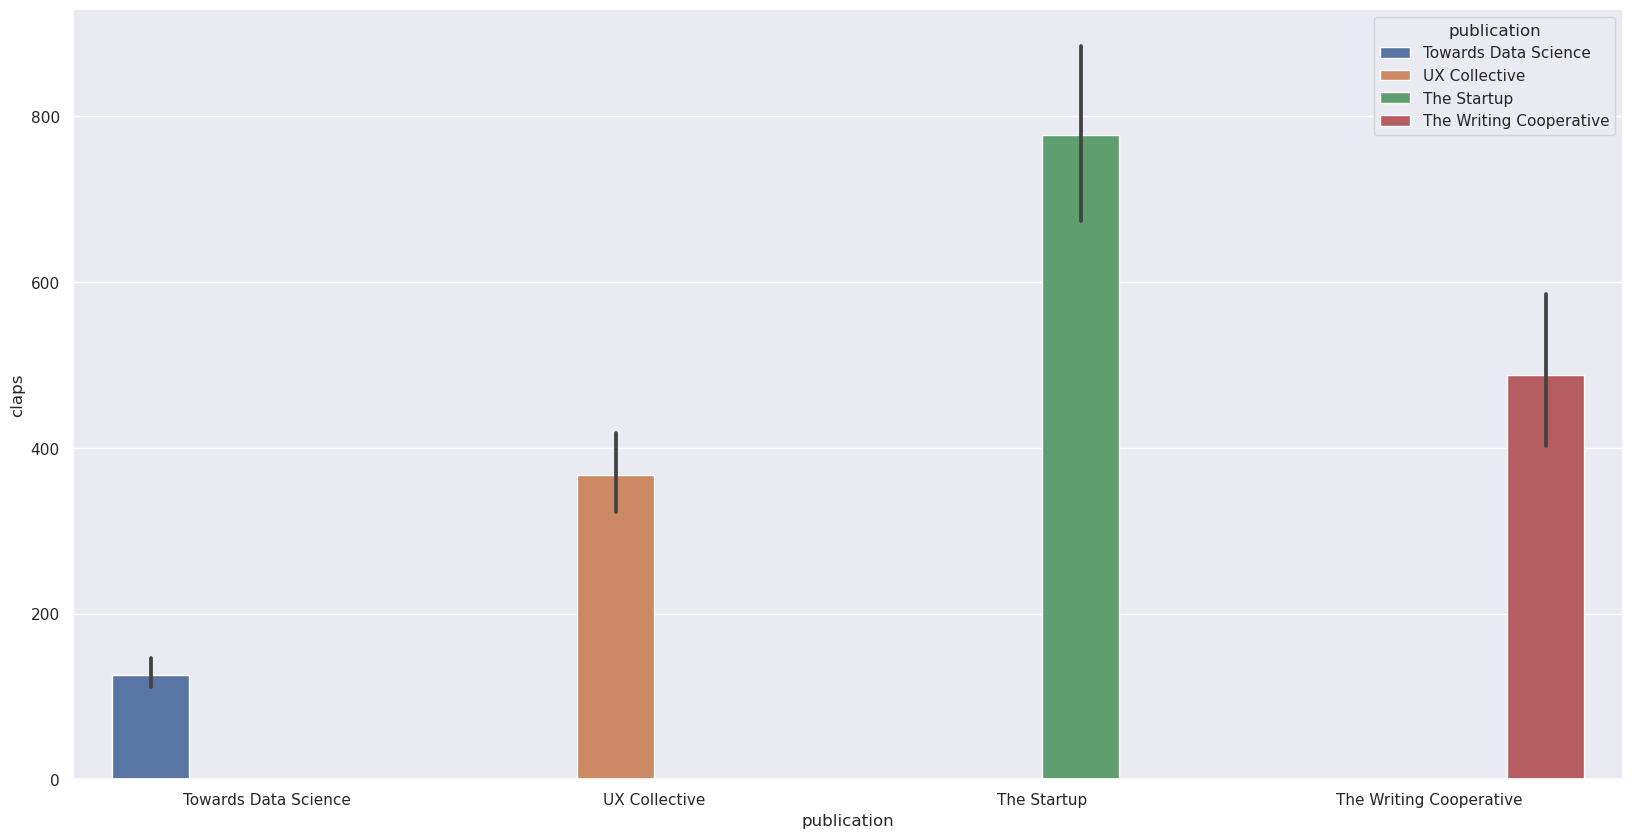

In [71]:
sns.barplot(data=medium_art,y='claps',x='publication',hue='publication')
plt.savefig('answer3.jpg')
plt.show()

In [60]:
words= ''.join(medium_art.title).lower()

In [61]:
cloud=WordCloud(stopwords=STOPWORDS,min_word_length=7,collocation_threshold=50,collocations=True,background_color='black',max_font_size=200,width=1600,height=800,relative_scaling=0.5).generate(words)

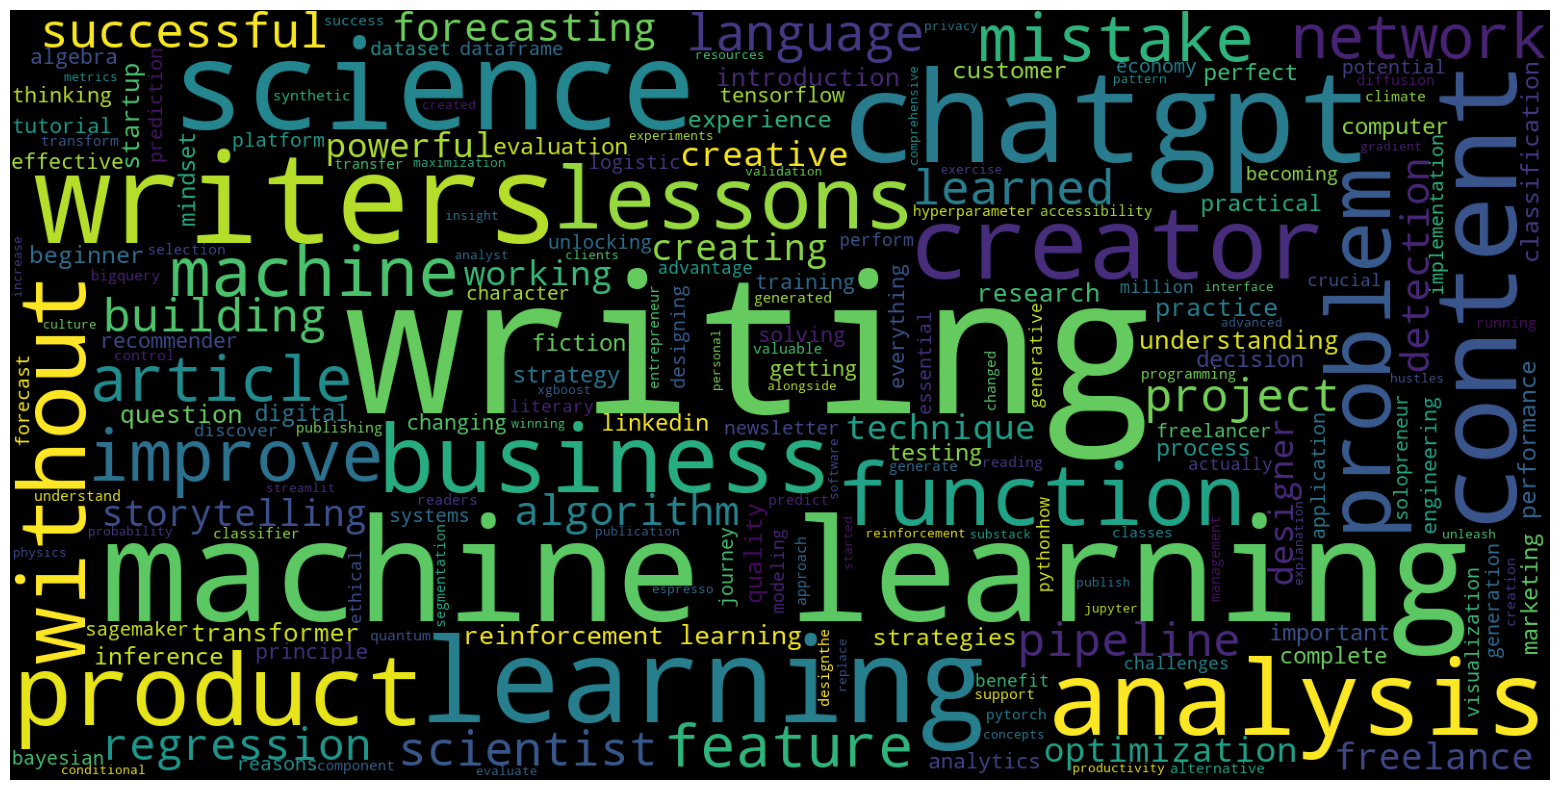

In [72]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('answer3.1.jpg')
plt.show()

# A:These are the titles that readers identify with the most, and the size of the words indicates that they are more widely read and applauded by the audience.
 > # It reveals that Chatgpt is a writing trend

> # 4. How long an article should be?

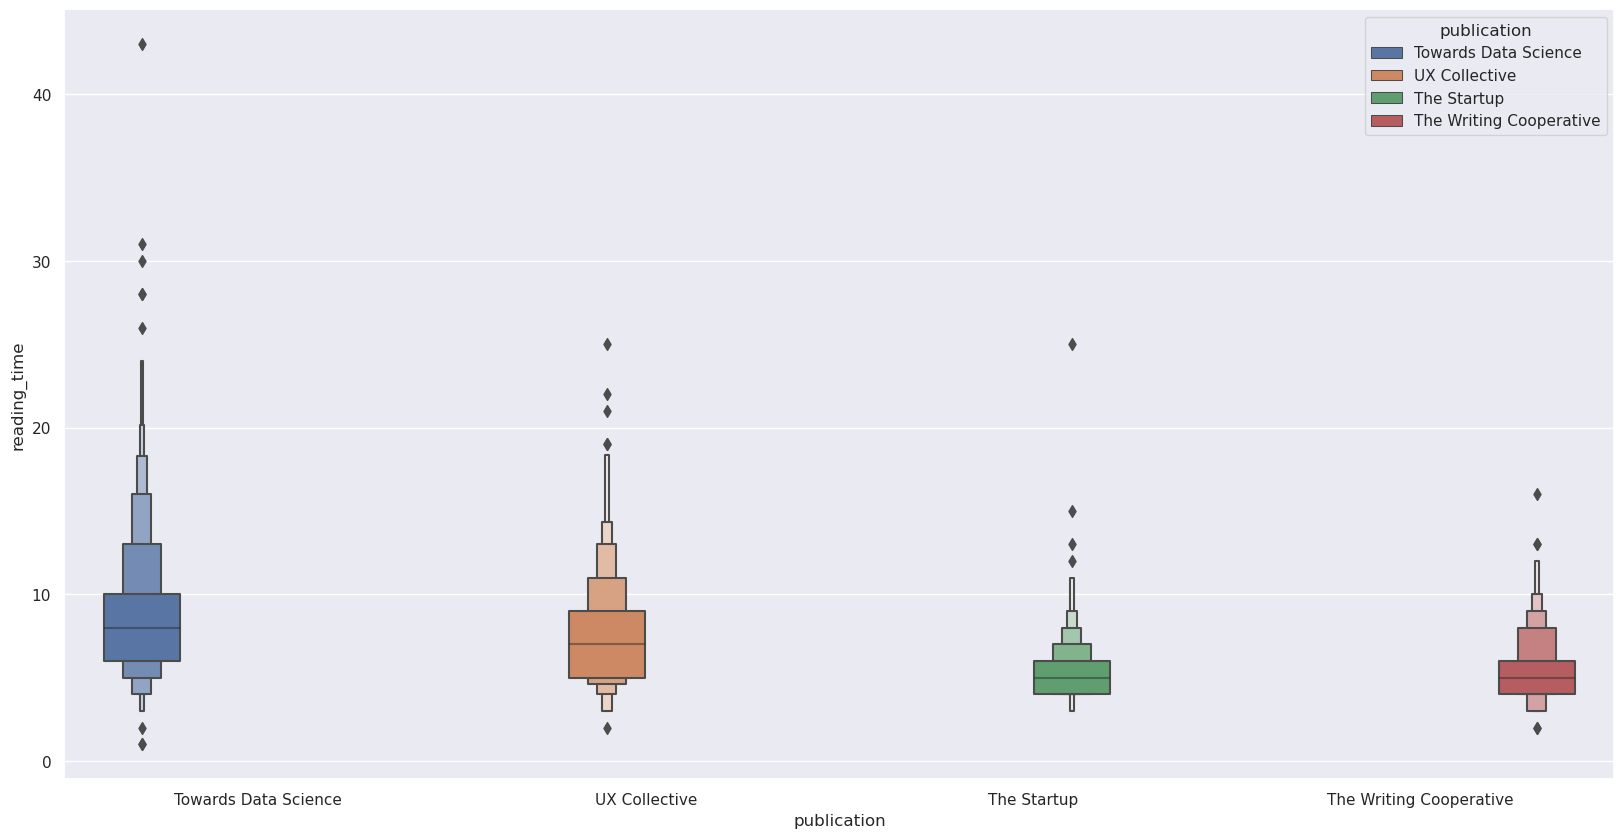

In [73]:
sns.boxenplot(data=medium_art,x='publication',y='reading_time',hue='publication')
plt.savefig('answer4.jpg')
plt.show()

# A:The length of article should be less than 10 mintues

# Please upvote for it and leave a comment if you enjoy my work.